In [1]:
import pandas as pd 
import numpy as np 
import sklearn as sk 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt 

data = pd.read_csv("austin_weather.csv") 


In [2]:
data = data.drop(['Events', 'Date', 'SeaLevelPressureHighInches', 'SeaLevelPressureLowInches'], axis = 1) 

data = data.replace('T', 0.0) 
data = data.replace('-', 0.0) 

In [3]:
data.to_csv('austin_final.csv') 

In [4]:
data = pd.read_csv("austin_final.csv") 

In [5]:
X = data.drop(['PrecipitationSumInches'], axis = 1)  
Y = data['PrecipitationSumInches'] 

#reshape into 2d vector 
Y = Y.values.reshape(-1, 1) 

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B1CC21668>


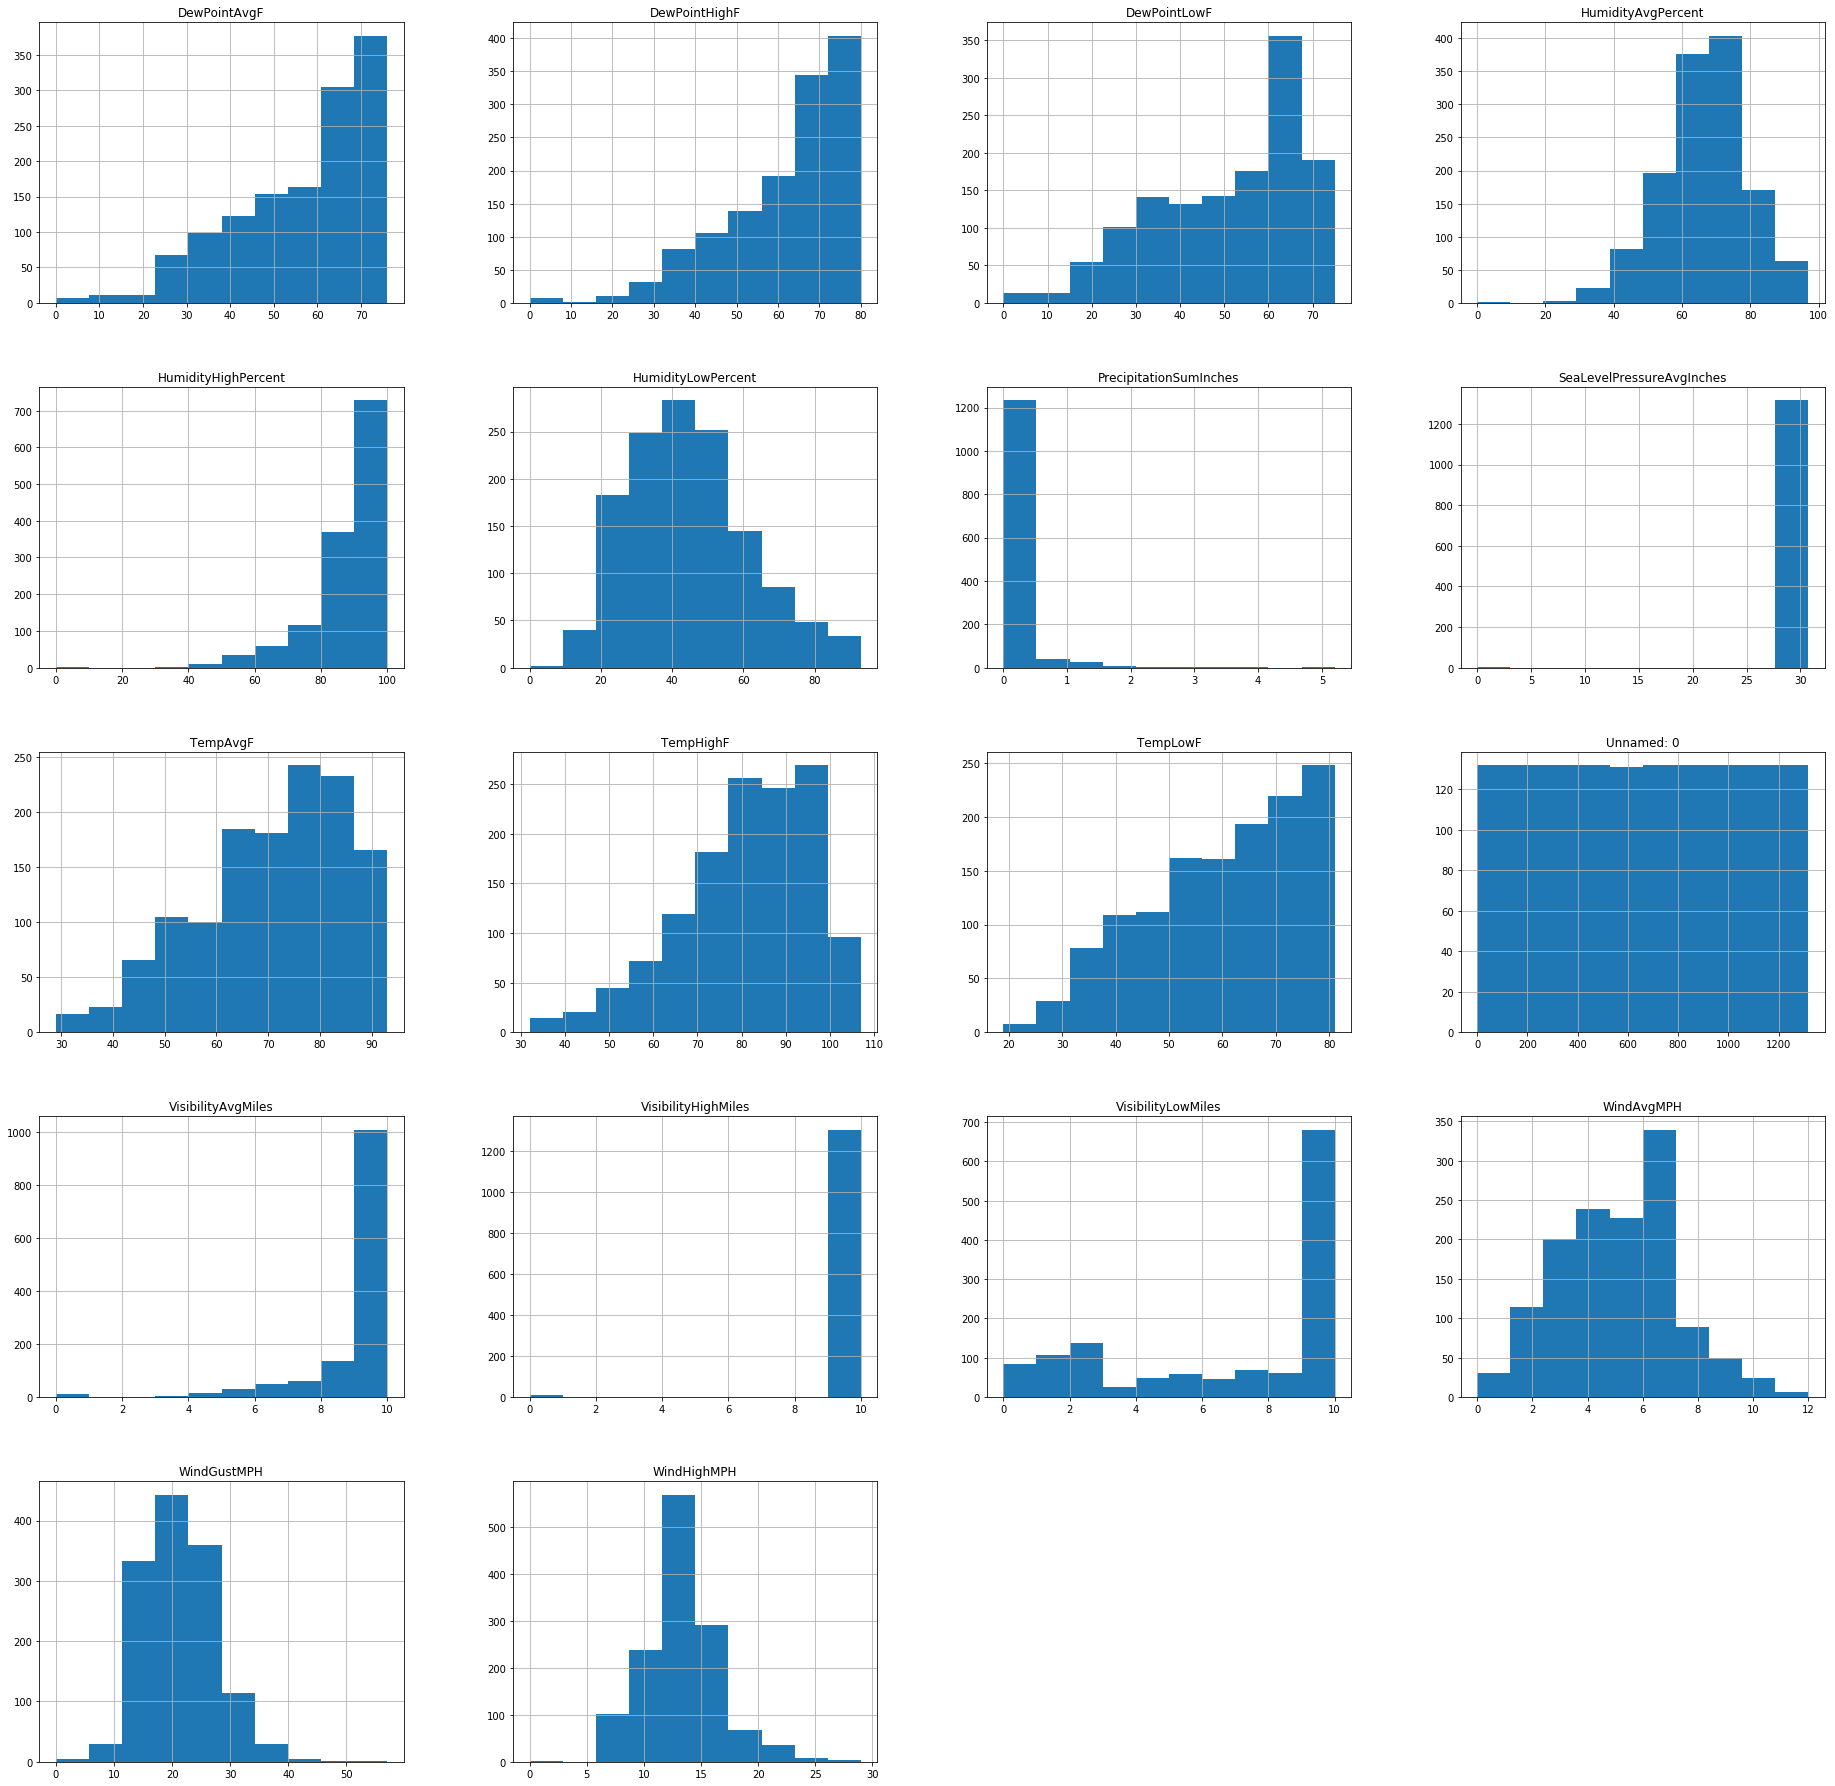

In [6]:
print(data.hist(figsize=(32,32)))

In [10]:
day_index = int(input("Enter the index of the day : "))
days = [i for i in range(Y.size)] 

# initialize a linear regression classifier 
clf = LinearRegression() 

#training
clf.fit(X, Y) 

inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45], [57], [29.68], [10], [7], [2], [0], [20], [4], [31]]) 
inp = inp.reshape(1, -1) 
print('The precipitation in inches for the test input is:', clf.predict(inp)) 


Enter the index of the day : 1200
The precipitation in inches for the test input is: [[1.33868402]]


Precipitation vs selected attributes graph: 


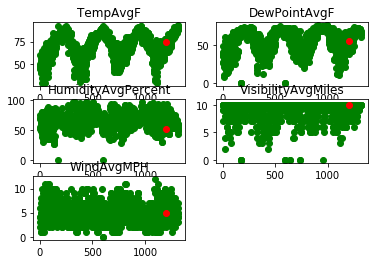

In [11]:
x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'VisibilityAvgMiles', 'WindAvgMPH'], axis = 1) 

print("Precipitation vs selected attributes graph: ") 

for i in range(x_vis.columns.size): 
    plt.subplot(3, 2, i + 1) 
    plt.scatter(days, x_vis[x_vis.columns.values[i][:100]], color = 'g') 

    plt.scatter(days[day_index], x_vis[x_vis.columns.values[i]][day_index], color ='r') 

    plt.title(x_vis.columns.values[i]) 

plt.show() 

The precipitation trend graph:-> 


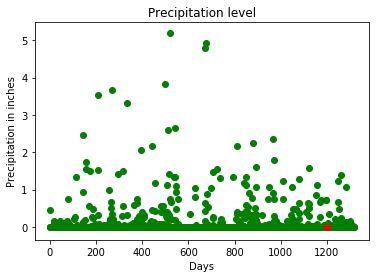

In [12]:
#output. 
print("The precipitation trend graph:-> ") 
plt.scatter(days, Y, color = 'g') 
plt.scatter(days[day_index], Y[day_index], color ='r') 
plt.title("Precipitation level") 
plt.xlabel("Days") 
plt.ylabel("Precipitation in inches") 

plt.show() 